<a href="https://colab.research.google.com/github/Sgraham6/Sean-Graham-Projects/blob/main/Sports_Analytics/Soccer_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Maryville/Primary Files/Semester 8/Sports Analytics/PlayerDetail.csv', sep = ',')
df.head()

Mounted at /content/drive


,Player#,Sport,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Muscle load,Perceived load,Player's estimate (RPE),Team_Role
0,2,Soccer,08/13/2018,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,0.0,NaN,NaN,Defender
1,2,Soccer,9/5/2019,15:33:22,1:12:50,3.47,135,187.0,2.9,27.0,726.0,36,101,80,NaN,NaN,NaN,Defender
2,2,Soccer,9/6/2019,16:53:36,2:12:03,10.25,159,218.0,4.7,29.1,1789.0,26,310,258,NaN,NaN,NaN,Defender
3,2,Soccer,9/8/2019,11:32:45,2:11:15,10.16,154,196.0,4.6,30.3,1646.0,26,285,233,NaN,NaN,NaN,Defender
4,2,Soccer,9/10/2019,15:32:19,0:56:33,2.45,128,178.0,2.6,22.1,496.0,39,63,51,NaN,NaN,NaN,Defender


In [2]:
df.dtypes

,0
Player#,int64
Sport,object
Day,object
Start time,object
Duration,object
Distance (km),float64
Average heart rate (bpm),int64
Maximum heart rate (bpm),float64
Average speed(km/h),float64
Speed max(km/h),float64


In [3]:
df.shape

(2784, 18)

In [4]:
df.describe()

,Player#,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Muscle load,Perceived load,Player's estimate (RPE)
count,2784.000000,2784.000000,2784.000000,2782.000000,2784.000000,2784.000000,2783.000000,2784.000000,2784.000000,2784.000000,33.0,0.0,0.0
mean,15.588721,5.947863,133.065733,203.903666,3.586889,27.362141,863.094502,35.205819,123.631106,109.031609,0.0,NaN,NaN
std,9.282721,17.547702,17.290556,22.817020,3.545314,11.286648,465.017866,11.326993,84.323910,70.075262,0.0,NaN,NaN
min,2.000000,0.000000,0.000000,62.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
25%,8.000000,3.410000,123.000000,188.000000,2.700000,24.500000,571.000000,28.000000,66.750000,65.000000,0.0,NaN,NaN
50%,12.000000,4.805000,134.000000,206.000000,3.300000,27.200000,828.000000,34.000000,110.000000,98.500000,0.0,NaN,NaN
75%,23.000000,6.270000,144.000000,223.000000,4.000000,30.000000,1094.000000,41.000000,166.000000,142.000000,0.0,NaN,NaN
max,35.000000,461.210000,212.000000,239.000000,74.300000,130.900000,5536.000000,80.000000,1024.000000,937.000000,0.0,NaN,NaN


In [5]:
df.isnull().sum(axis = 0) # We can see the Total row is 2570, the three columns: Muscle load, Perceived load and
                          # Player's estimate (RPE) has the most null or missing values.

,0
Player#,0
Sport,0
Day,0
Start time,0
Duration,0
Distance (km),0
Average heart rate (bpm),0
Maximum heart rate (bpm),2
Average speed(km/h),0
Speed max(km/h),0


Drop the columns with most missing values: **Muscle load, Perceived laod, Player's estimate**

In [6]:
df.drop(['Muscle load', 'Perceived load'], axis=1, inplace = True)

In [7]:
df.drop("Player's estimate (RPE)",axis=1, inplace = True )

In [8]:
df.drop('Sport', axis=1, inplace = True ) # We know that this is for soccer analysis, so the sport column
                                          # is not helpful, we can drop it as well.

In [9]:
df.head()

,Player#,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Team_Role
0,2,08/13/2018,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,Defender
1,2,9/5/2019,15:33:22,1:12:50,3.47,135,187.0,2.9,27.0,726.0,36,101,80,Defender
2,2,9/6/2019,16:53:36,2:12:03,10.25,159,218.0,4.7,29.1,1789.0,26,310,258,Defender
3,2,9/8/2019,11:32:45,2:11:15,10.16,154,196.0,4.6,30.3,1646.0,26,285,233,Defender
4,2,9/10/2019,15:32:19,0:56:33,2.45,128,178.0,2.6,22.1,496.0,39,63,51,Defender


In [11]:
df['Day'] =  pd.to_datetime(df['Day'])
df.head(10)

,Player#,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Team_Role
0,2,2018-08-13,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,Defender
1,2,2019-09-05,15:33:22,1:12:50,3.47,135,187.0,2.9,27.0,726.0,36,101,80,Defender
2,2,2019-09-06,16:53:36,2:12:03,10.25,159,218.0,4.7,29.1,1789.0,26,310,258,Defender
3,2,2019-09-08,11:32:45,2:11:15,10.16,154,196.0,4.6,30.3,1646.0,26,285,233,Defender
4,2,2019-09-10,15:32:19,0:56:33,2.45,128,178.0,2.6,22.1,496.0,39,63,51,Defender
5,2,2019-09-11,14:56:28,2:17:27,9.29,155,208.0,4.1,28.8,1743.0,27,296,249,Defender
6,2,2019-09-13,14:03:08,1:36:46,4.97,131,187.0,3.1,26.6,891.0,34,126,104,Defender
7,2,2019-09-14,9:01:22,0:59:07,3.52,125,181.0,3.6,27.0,484.0,38,61,51,Defender
8,2,2019-09-15,14:29:00,2:19:24,10.95,160,190.0,4.7,30.7,1878.0,25,330,271,Defender
9,2,2019-09-17,15:18:24,1:51:18,3.37,124,183.0,1.8,44.2,903.0,43,103,90,Defender


In [12]:
df.dtypes

,0
Player#,int64
Day,datetime64[ns]
Start time,object
Duration,object
Distance (km),float64
Average heart rate (bpm),int64
Maximum heart rate (bpm),float64
Average speed(km/h),float64
Speed max(km/h),float64
Calories,float64


### Task 1: examine the weekly workload numbers for these individuals and average them out

Instead of examine the workload weekly, I examined it monthly:

In [13]:
df.Day.dt.month.head(10)

,Day
0,8
1,9
2,9
3,9
4,9
5,9
6,9
7,9
8,9
9,9


In [14]:
df['week']  = df.Day.dt.isocalendar().week
df['month'] = df.Day.dt.month
df['year']= df.Day.dt.year

In [15]:
df = df.sort_values(by=['Day'], ascending=True)
df.head() # view the first few rows of the PlayerDetail table, we can see that we add new columns at the end,
          # week, month, and year

,Player#,Day,Start time,Duration,Distance (km),Average heart rate (bpm),Maximum heart rate (bpm),Average speed(km/h),Speed max(km/h),Calories,Fat percentage of calories (%),Training load,Cardio load,Team_Role,week,month,year
0,2,2018-08-13,9:32:22,1:52:23,5.25,148,218.0,2.8,25.1,1333.0,29,228,176,Defender,33,8,2018
977,11,2018-08-28,15:27:13,1:48:53,5.69,148,192.0,3.1,30.4,1282.0,27,223,178,Midfielder,35,8,2018
978,11,2018-08-29,15:28:55,1:55:13,4.02,109,181.0,2.1,27.4,732.0,44,80,75,Midfielder,35,8,2018
979,11,2018-08-30,17:43:41,2:08:36,8.73,153,189.0,4.1,32.5,1612.0,26,288,235,Midfielder,35,8,2018
980,11,2018-09-01,14:07:00,2:15:53,6.08,150,223.0,2.9,37.8,1309.0,31,227,198,Midfielder,35,9,2018


Modify the column names without spaces

In [16]:
df.columns = df.columns.str.replace(' ', '_')

In [17]:
df.columns = df.columns.str.replace('Player#', 'PlayerNo')

In [18]:
df.columns

Index(['PlayerNo', 'Day', 'Start_time', 'Duration', 'Distance_(km)',
       'Average_heart_rate_(bpm)', 'Maximum_heart_rate_(bpm)',
       'Average_speed(km/h)', 'Speed_max(km/h)', 'Calories',
       'Fat_percentage_of_calories_(%)', 'Training_load', 'Cardio_load',
       'Team_Role', 'week', 'month', 'year'],
      dtype='object')

Calculate the mean of workload by month

In [19]:
%matplotlib inline

In [20]:
pd.set_option('display.max_rows', None) # in order to see the truncated data series.

In [21]:
df_monthly_mean = round(df.groupby(['PlayerNo','year','month','week']).Training_load.mean(),2) # we can see the mean of training_load for different
                                                                                               # year and month, for the year, we have 2018 to 2022

In [22]:
df_monthly_mean

PlayerNo  year  month  week
2         2018  8      33      228.00
          2019  9      36      232.00
                       37      175.20
                       38      144.80
                       39      149.20
                10     40      118.33
                11     47      107.00
                       48      148.00
          2020  1      3        23.00
                       4       112.00
                2      6       197.50
                       7       215.00
                       8       129.00
                       9       146.00
                3      10      127.00
          2021  1      3       190.00
                       4       213.00
                2      5       149.60
                       6       172.25
                       7       128.75
                       8       122.00
                3      9       124.40
                       10      103.60
                       11       68.33
                       12      192.20
                       13       66.00
                4      13      286.00
                       14      345.75
                       15       78.50
                       16      284.25
                8      32      147.00
                       33       84.20
                       34      112.00
                       35      154.00
                9      35      178.00
                       36      106.71
                       37      114.83
                       38      165.00
                       39      148.00
                10     39      266.00
                       43      105.50
                11     44      138.00
                       45       84.50
                       46      120.33
          2022  1      2       148.25
                       3        68.00
                       4       114.67
                       5        52.00
                2      6        92.00
                       7        41.00
                       8       122.50
                       9        21.00
                3      9       167.33
                       11      118.20
                       12       97.33
                       13       19.00
4         2021  3      9       139.75
                       10      136.20
                       11      112.75
                4      14      226.00
                       15       88.75
                       16      130.33
                8      33      177.43
                       34      125.20
                       35      188.00
                9      35       72.50
                       36       91.00
                       37       36.50
                       38       59.00
                       39      136.50
                10     40       85.40
                       41      119.25
                       42      111.17
                       43      174.33
                11     44       66.00
                       45       64.00
                       46       76.50
          2022  1      3        80.60
                       4       154.75
                       5        95.00
                2      6       149.50
                       7       134.00
                       8       105.75
                       9        78.00
                3      9       111.25
                       11      139.00
                       12      143.25
                       13       60.00
5         2021  2      5       314.00
                       6       216.00
                       8        97.00
                3      9       160.50
                       10      142.50
                       11      157.00
                       12      205.00
                       13      150.00
                4      13       36.00
                       14      210.00
                       15      171.25
                       16      144.50
                8      32      192.17
                       33      181.57
                       34      197.80
                       35      218.00
                9   

### Analyze weekly mean for each individual

In [23]:
## function to calculate weekly mean by PlayerNo and year

def get_weekly_mean_single(PlayerNo, year):
    x = df[(df['PlayerNo'] == PlayerNo)&(df['year']==year)]
    if len(x) == 0:
        return 'There is no data for this player'
    else:
        x = round(x.groupby(['month','week']).Training_load.mean(),2)
        y = x.to_frame('mean').reset_index()
        #y.drop(['month'], axis=1, inplace = True)
        return y

In [24]:
df.dtypes

,0
PlayerNo,int64
Day,datetime64[ns]
Start_time,object
Duration,object
Distance_(km),float64
Average_heart_rate_(bpm),int64
Maximum_heart_rate_(bpm),float64
Average_speed(km/h),float64
Speed_max(km/h),float64
Calories,float64


In [25]:
## In this example, we will choose player 4, and year 2021

df1 = get_weekly_mean_single(4, 2021)
df1

,month,week,mean
0,3,9,139.75
1,3,10,136.20
2,3,11,112.75
3,4,14,226.00
4,4,15,88.75
5,4,16,130.33
6,8,33,177.43
7,8,34,125.20
8,8,35,188.00
9,9,35,72.50


In [26]:
year_array = df.year.unique()
year_array

array([2018, 2019, 2020, 2021, 2022], dtype=int32)

In [27]:
player_array = df.PlayerNo.unique()
player_array.sort()
print(player_array)

[ 2  4  5  7  8  9 10 11 12 14 15 16 19 20 21 22 23 24 25 26 27 28 29 31
 34 35]


In [31]:
df12 = pd.DataFrame(columns = ['player', 'year', 'count', 'min', 'max', 'mean'])
for i in player_array:
  for j in year_array:
    df_week = get_weekly_mean_single(i, j)
    if type(df_week) == str:
      dic = {'player': i, 'year': j,'count': 0, 'min': 0, 'max': 0, 'mean': 0}
      df12.loc[len(df12)] = dic
    else:
      df_week.columns = df_week.columns.str.replace('mean', 'weekly_mean')
      df11 = df_week.weekly_mean.agg(['count', 'min', 'max', 'mean'])
      dic = {'player': i, 'year': j,'count': df11['count'], 'min': df11['min'], 'max': df11['max'], 'mean': df11['mean']}
      df12.loc[len(df12)] = dic

In [32]:
df12['player'] = df12['player'].astype(int)
df12['year'] = df12['year'].astype(int)
df12['count'] = df12['count'].astype(int)
df12['mean'] = df12['mean'].round(2)
df12

,player,year,count,min,max,mean
0,2,2018,1,228.00,228.00,228.00
1,2,2019,7,107.00,232.00,153.50
2,2,2020,7,23.00,215.00,135.64
3,2,2021,29,66.00,345.75,153.40
4,2,2022,12,19.00,167.33,88.44
5,4,2018,0,0.00,0.00,0.00
6,4,2019,0,0.00,0.00,0.00
7,4,2020,0,0.00,0.00,0.00
8,4,2021,21,36.50,226.00,115.07
9,4,2022,11,60.00,154.75,113.74


**we can see that there is no data for player 4, year 2018; then we will stop and choose another year
to see if we got any data**

In [33]:
## In this example, we will choose player 5, and year 2021

df1 = get_weekly_mean_single(5,2021)
df1

,month,week,mean
0,2,5,314.00
1,2,6,216.00
2,2,8,97.00
3,3,9,160.50
4,3,10,142.50
5,3,11,157.00
6,3,12,205.00
7,3,13,150.00
8,4,13,36.00
9,4,14,210.00


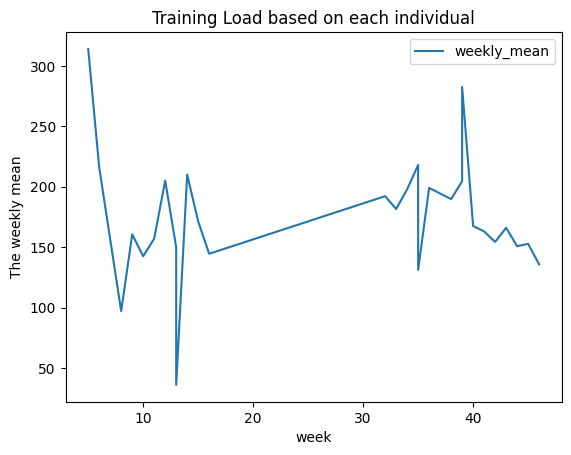

In [34]:
## if there is no data for the player, we will stop; if we got some data, then we will continue to generate the line plot
df1.columns = df1.columns.str.replace('mean', 'weekly_mean')
ax = df1.plot(x='week', y = 'weekly_mean')
ax.set_ylabel('The weekly mean')
ax.set_title('Training Load based on each individual')
plt.show()

In [35]:
## calculate the mean for weekly mean;(the mean value for the above graph)

df1.weekly_mean.mean()

np.float64(174.65214285714288)

In [36]:
df1.weekly_mean.agg(['count', 'min', 'max', 'mean'])
## For the above graph, we can see the count, minimum and maximum value and the mean value list as below;

,weekly_mean
count,28.000000
min,36.000000
max,314.000000
mean,174.652143


### Analyze weekly mean for whole team

In [37]:
## function to calculate weekly mean by a specific year; if there is no data for that year,
## it will output a message:"There is no data for this year"

def get_weekly_mean_team(year):
    x = df[df['year']==year]
    if len(x) == 0:
        return 'There is no data for this year'
    else:
        x = round(x.groupby(['month','week']).Training_load.mean(),2)
        y = x.to_frame('mean').reset_index()
        #y.drop(['month'], axis=1, inplace = True)
        return y

In [38]:
df2 = get_weekly_mean_team(2021)
df2

,month,week,mean
0,1,3,172.36
1,1,4,172.78
2,2,5,118.55
3,2,6,177.66
4,2,7,147.41
5,2,8,133.47
6,3,9,119.50
7,3,10,130.87
8,3,11,134.42
9,3,12,140.13


In [39]:
df2.columns = df2.columns.str.replace('mean', 'weekly_mean')
df2.weekly_mean.agg(['count', 'min', 'max', 'mean'])

,weekly_mean
count,32.00
min,77.13
max,241.60
mean,133.78


In [40]:
df8 = pd.DataFrame(columns = ['year', 'count', 'min','max','mean'])
for i in year_array:
  df_week = get_weekly_mean_team(i)
  if type(df_week) == str:
    dic = {'year': i,'count': 0, 'min': 0, 'max': 0, 'mean': 0}
    df8.loc[len(df8)] = dic
  else:
    df_week.columns = df_week.columns.str.replace('mean', 'weekly_mean')
    df9 = df_week.weekly_mean.agg(['count', 'min', 'max', 'mean'])
    dic = {'year': i,'count': df9['count'], 'min': df9['min'], 'max': df9['max'], 'mean': df9['mean']}
    df8.loc[len(df8)] = dic

In [41]:
df8['year'] = df8['year'].astype(int)
df8['count'] = df8['count'].astype(int)
df8['mean'] = df8['mean'].round(2)
df8

,year,count,min,max,mean
0,2018,14,97.50,335.50,199.39
1,2019,29,40.00,225.25,144.35
2,2020,8,55.80,159.75,104.64
3,2021,32,77.13,241.60,133.78
4,2022,12,46.35,133.61,107.79


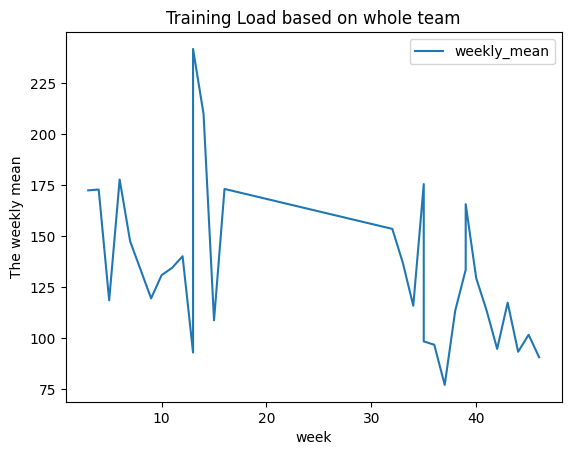

In [42]:
## if there is no data for the player, we will stop; if we got some data, then we will continue to generate the line plot
ax = df2.plot(x='week', y = 'weekly_mean')
ax.set_ylabel('The weekly mean')
ax.set_title('Training Load based on whole team')
plt.show()

In [43]:
## calculate the mean for weekly mean;(the mean value for the above graph)

# round function added as original output was 133.78000000000003
round(df2.weekly_mean.mean(), 2)

np.float64(133.78)

In [44]:
df2.weekly_mean.agg(['count', 'min', 'max', 'mean'])
## For the above graph, we can see the count, minimum and maximum value and the mean value list as below;

,weekly_mean
count,32.00
min,77.13
max,241.60
mean,133.78


### Task 2: split the members up based on whether they are F (forward), D (defender), or M (midfielder) and examine and average the workloads for these three positions.

In [45]:
df.Team_Role.unique()
position_array = df.Team_Role.unique()

Calculate the mean of workload for each position.

In [46]:
## For Defender, we have data for 2018, 2019, 2020, 2021, 2022
## For Forward, we have data for 2019, 2020, 2021, 2022
## For GoalKeeper, we only have data for 2020
## For Midfielder, we have data for 2018, 2019, 2020, 2021, 2022

round(df.groupby(['Team_Role','year','month','week']).Training_load.mean(),2)

Team_Role   year  month  week
Defender    2018  8      33      228.00
            2019  9      36      232.00
                         37      175.20
                         38      144.80
                         39      149.20
                  10     40      118.33
                         41      238.67
                         42      209.75
                         43      159.20
                         44       66.50
                  11     44      323.00
                         45      137.25
                         46      145.67
                         47      109.33
                         48      152.80
                  12     49      122.00
            2020  1      3        23.00
                         4       112.00
                  2      6       197.50
                         7       215.00
                         8       129.00
                         9       146.00
                  3      10      127.00
            2021  1      3       184.67
                         4       203.94
                  2      5       129.04
                         6       189.10
                         7       154.75
                         8       141.16
                  3      9       125.93
                         10      112.50
                         11       86.92
                         12      175.15
                         13      108.12
                  4      13      232.75
                         14      224.67
                         15      116.06
                         16      212.80
                  8      32      169.58
                         33      135.69
                         34      135.45
                         35      199.20
                  9      35      127.04
                         36      113.72
                         37      100.84
                         38      129.77
                         39      151.67
                  10     39      224.71
                         40      154.57
                         41      141.71
                         42      109.24
                         43      139.21
                  11     44      113.00
                         45      120.59
                         46      128.64
            2022  1      2       162.15
                         3       131.04
                         4       137.41
                         5       114.80
                  2      6       139.59
                         7       140.33
                         8       115.18
                         9        72.83
                  3      9       152.56
                         11      148.50
                         12      133.67
                         13       37.43
Forward     2019  9      36      107.50
                         37      139.60
                         38       68.00
                         39       47.67
                  10     40       75.00
                         41      123.60
                         42      127.50
                         43       56.60
                         44       68.50
                  11     44      115.00
                         47       54.00
                         48       67.00
                  12     49      113.00
            2020  1      3        59.50
                         4       108.88
                         5       111.43
                  2      6       131.00
                         7       140.00
                         8       106.00
                         9       112.67
                  3      10      101.00
            2021  1      3       133.58
                         4       111.91
                  2      5        85.60
                         6       121.86
                         7       109.50
                         8        92.78
                  3      9        61.30
                         10      118.00
                         11       82.14
                         12      100.90
                         13       77.17
          

In [47]:
## create a dataframe with a specific year;

x = round(df.groupby(['Team_Role','year','month','week']).Training_load.mean(),2)
z = x.to_frame('mean').reset_index()

def get_role_data(year, z):
    df = z[z['year']==year]
    df.columns = df.columns.str.replace('mean', 'weekly_mean')
    return df

In [48]:
df8 = get_role_data(2019, z)

In [49]:
Defender = df8[df8['Team_Role']=='Defender']
Forward = df8[df8['Team_Role']=='Forward']
Goalkeeper = df8[df8['Team_Role']=='Goalkeeper']
Midfielder = df8[df8['Team_Role']=='Midfielder']

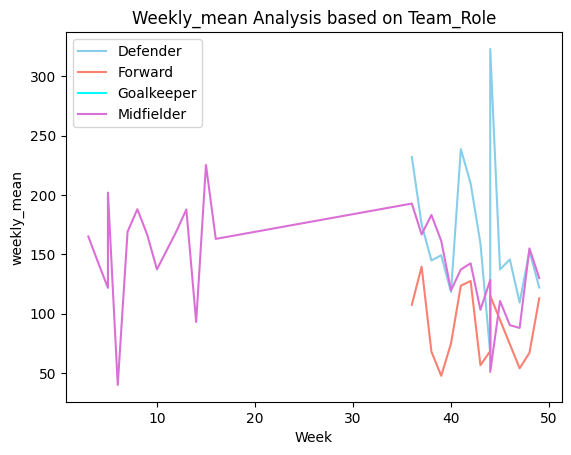

In [50]:
fig, ax = plt.subplots()
ax.plot(Defender['week'], Defender['weekly_mean'], color = 'skyblue', label = 'Defender')
ax.plot(Forward['week'], Forward['weekly_mean'], color = 'salmon', label = 'Forward')
ax.plot(Goalkeeper['week'], Goalkeeper['weekly_mean'], color = 'aqua', label = 'Goalkeeper')
ax.plot(Midfielder['week'], Midfielder['weekly_mean'], color = 'orchid', label = 'Midfielder')

ax.set_xlabel('Week')
ax.set_ylabel('weekly_mean')
ax.set_title("Weekly_mean Analysis based on Team_Role")
plt.legend(loc = 'best')
plt.show()

## For Defender, we have data for 2018, 2019, 2020, 2021, 2022
## For Forward, we have data for 2019, 2020, 2021, 2022
## For GoalKeeper, we only have data for 2020
## For Midfielder, we have data for 2018, 2019, 2020, 2021, 2022

## BELOW the graph is based on the data for year 2021;

In [51]:
## function to calculate weekly mean by position and year

def get_weekly_mean_position(Position, year):
    x = df[(df['Team_Role'] == Position)&(df['year']==year)]
    if len(x) == 0:
        return 'There is no data for this player'
    else:
        x = round(x.groupby(['month','week']).Training_load.mean(),2)
        y = x.to_frame('mean').reset_index()
        #y.drop(['month'], axis=1, inplace = True)
        return y

In [52]:
df20 = pd.DataFrame(columns = ['position','year', 'count', 'min','max','mean'])

for i in position_array:
  for j in year_array:
    df_week = get_weekly_mean_position(i, j)
    if type(df_week) == str:
      dic = {'position': i, 'year': j,'count': 0, 'min': 0, 'max': 0, 'mean': 0}
      df20.loc[len(df20)] = dic
    else:
      df_week.columns = df_week.columns.str.replace('mean', 'weekly_mean')
      df21 = df_week.weekly_mean.agg(['count', 'min', 'max', 'mean'])
      dic = {'position': i, 'year': j,'count': df21['count'], 'min': df21['min'], 'max': df21['max'], 'mean': df21['mean']}
      df20.loc[len(df20)] = dic

In [53]:
df20

,position,year,count,min,max,mean
0,Defender,2018,1.0,228.00,228.00,228.000000
1,Defender,2019,15.0,66.50,323.00,165.580000
2,Defender,2020,7.0,23.00,215.00,135.642857
3,Defender,2021,32.0,86.92,232.75,149.755938
4,Defender,2022,12.0,37.43,162.15,123.790833
5,Midfielder,2018,13.0,97.50,335.50,197.192308
6,Midfielder,2019,29.0,40.00,225.25,142.454828
7,Midfielder,2020,8.0,47.70,155.25,106.237500
8,Midfielder,2021,32.0,80.05,271.20,139.405312
9,Midfielder,2022,12.0,65.00,140.96,112.405000


In [54]:
df20['count'] = df20['count'].astype(int)
df20.columns = df20.columns.str.replace('count', 'weeks_count')
df20['mean'] = df20['mean'].round(2)
df20

,position,year,weeks_count,min,max,mean
0,Defender,2018,1,228.00,228.00,228.00
1,Defender,2019,15,66.50,323.00,165.58
2,Defender,2020,7,23.00,215.00,135.64
3,Defender,2021,32,86.92,232.75,149.76
4,Defender,2022,12,37.43,162.15,123.79
5,Midfielder,2018,13,97.50,335.50,197.19
6,Midfielder,2019,29,40.00,225.25,142.45
7,Midfielder,2020,8,47.70,155.25,106.24
8,Midfielder,2021,32,80.05,271.20,139.41
9,Midfielder,2022,12,65.00,140.96,112.41


<Axes: xlabel='Team_Role'>

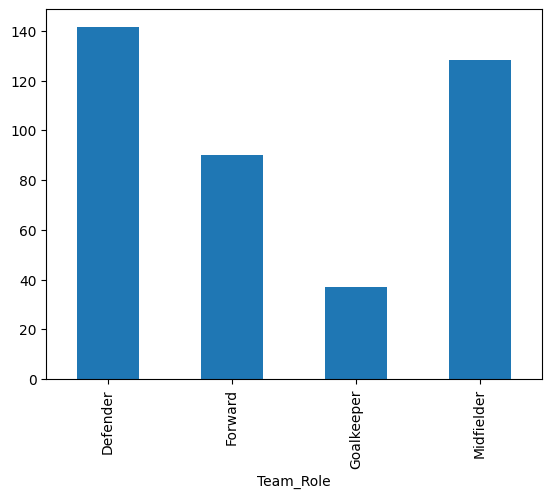

In [55]:
## For the whole team, we can see the mean of training load for each player;

round(df.groupby('Team_Role').Training_load.mean(),2).plot(kind='bar')

In [56]:
round(df.groupby('Team_Role').Cardio_load.mean(),2)

,Cardio_load
Team_Role,
Defender,119.61
Forward,89.60
Goalkeeper,29.40
Midfielder,111.70


<Axes: xlabel='Team_Role'>

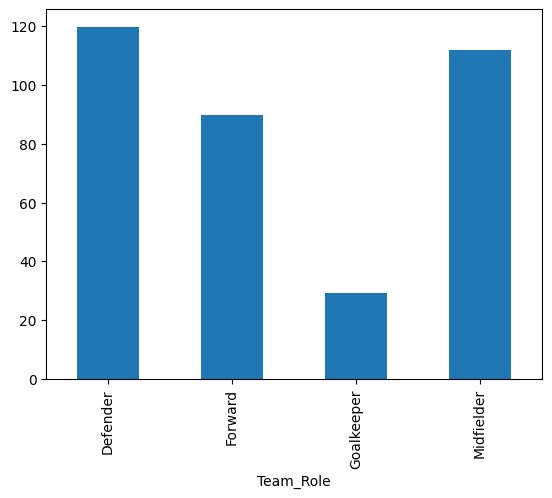

In [57]:
round(df.groupby('Team_Role').Cardio_load.mean(),2).plot(kind='bar')

In [58]:
round(df.groupby(['Team_Role','year','month','week']).Cardio_load.mean(),2)

Team_Role   year  month  week
Defender    2018  8      33      176.00
            2019  9      36      190.33
                         37      145.20
                         38      121.80
                         39      126.20
                  10     40      102.67
                         41      219.67
                         42      179.00
                         43      145.40
                         44       66.50
                  11     44      268.50
                         45      112.00
                         46      119.67
                         47       92.67
                         48      129.40
                  12     49       94.00
            2020  1      3        25.00
                         4        93.00
                  2      6       154.50
                         7       173.00
                         8       102.00
                         9       111.00
                  3      10      100.67
            2021  1      3       156.17
                         4       170.11
                  2      5       110.74
                         6       158.33
                         7       132.20
                         8       122.32
                  3      9       104.86
                         10       93.25
                         11       75.33
                         12      144.62
                         13       92.25
                  4      13      196.00
                         14      203.50
                         15      104.25
                         16      184.20
                  8      32      136.58
                         33      116.06
                         34      115.83
                         35      164.60
                  9      35      107.78
                         36       97.04
                         37       86.84
                         38      112.23
                         39      126.11
                  10     39      189.00
                         40      129.29
                         41      120.12
                         42       93.44
                         43      116.86
                  11     44       98.88
                         45      102.94
                         46      107.55
            2022  1      2       130.95
                         3       108.30
                         4       113.56
                         5        92.60
                  2      6       114.85
                         7       119.07
                         8        96.91
                         9        61.33
                  3      9       127.17
                         11      122.96
                         12      114.67
                         13       33.86
Forward     2019  9      36       99.75
                         37      126.00
                         38       67.75
                         39       45.17
                  10     40       69.67
                         41      110.80
                         42      121.25
                         43       62.80
                         44       69.50
                  11     44      114.00
                         47       47.00
                         48       74.00
                  12     49      100.00
            2020  1      3        56.00
                         4        92.12
                         5        95.43
                  2      6       104.00
                         7       109.00
                         8        83.00
                         9        87.33
                  3      10       81.50
            2021  1      3       123.25
                         4       125.45
                  2      5        90.50
                         6       124.71
                         7       104.75
                         8        97.11
                  3      9        62.70
                         10      114.88
                         11       79.86
                         12       95.10
                         13       73.33
          

In [59]:
df4 = pd.DataFrame(df.loc[:,['Team_Role','Training_load','Cardio_load']])
df4 = round(df4.groupby('Team_Role').mean(), 2)
df4

,Training_load,Cardio_load
Team_Role,,
Defender,141.52,119.61
Forward,90.15,89.60
Goalkeeper,37.00,29.40
Midfielder,128.25,111.70


<Axes: xlabel='Team_Role'>

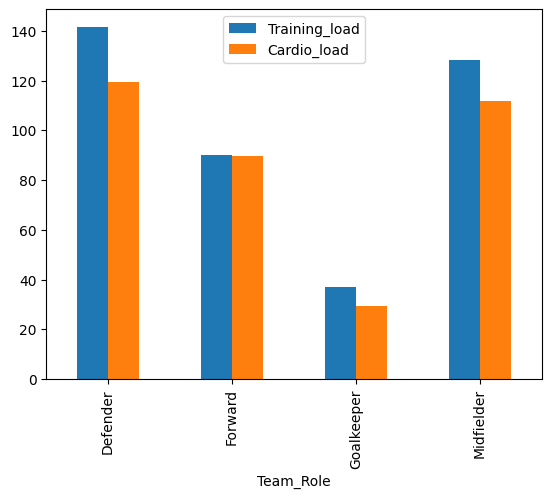

In [60]:
df4.plot(kind='bar')  ## This graph is based on the whole team data;

### Task 3: create Acute:Chronic Workload Ratio (ACWR) numbers for the week leading up to injury for the players

ACWR - Acute chronic ratio

In [61]:
df7 = pd.DataFrame(df.loc[(df['PlayerNo'] == 8),['year','week','Training_load']])
df7 = df7.groupby(['year','week']).sum()
df7

Training_load
year week               
2019 38              185
     39              446
     40              624
     41              475
     42              486
     43              321
     44              229
     45              401
     46              180
     47               88
     48              465
     49              130
2020 3                78
     4               422
     5               313
     6               300
     7               253
     8               170
     9               176
     10              354
2021 3               651
     4               585
     5               520
     6               621
     7               401
     8               528
     9               396
     10              516
     11             1341
     12              715
     13              220
     14              423
     15              426
     16              466
2022 3               108
     4               415
     5               127
     6               499
     7               300
     8               221
     9               344
     11              473
     12              593
     13               30

In [62]:
date = pd.to_datetime('5/15/2021')
year_curr = date.year
week_curr = date.week
week_curr

19

In [63]:
def cal_acwr(PlayerNo, DateofInjury):  ## not implement: if week <5; we need to get the data from previous year.
  date = pd.to_datetime(DateofInjury)
  year_curr = date.year
  week_curr = date.week
  df1 = pd.DataFrame(df.loc[(df['PlayerNo'] == PlayerNo),['year','week','Training_load']])
  x = df1.groupby(['year','week']).Training_load.sum()
  df2 = x.to_frame('Training_Load_sum').reset_index()
  curr_load = pd.DataFrame(df2.loc[(df2['year'] == year_curr) & (df2['week'] == week_curr),'Training_Load_sum'])
  if len(curr_load)==0:
    return "the total training Load for this week is 0, and the acwr will be 0."
  else:
    curr_load = curr_load.iloc[0].values[0]
    ## count the total for previous 4 weeks

  pre_total = 0
  for i in range(4):
    load = pd.DataFrame(df2.loc[(df2['year'] == year_curr) & (df2['week'] == week_curr -i-1),'Training_Load_sum'])
    if len(load)==0:
      load = 0
    else:
      load = load.iloc[0].values[0]
    pre_total += load

  mean_pre_total = pre_total/4
  if mean_pre_total == 0:
    return print("We don't have training data for this player for previous four weeks before injury")
  else:
    acwr = curr_load/mean_pre_total
    return acwr

In [64]:
## Let check it using player 10, injury date is 03/22/2022

cal_acwr(10, '3/22/2022')

np.float64(0.4647006255585344)

In [65]:
cal_acwr(35, '3/28/2022')

np.float64(0.2931297709923664)

Get the Clean Players' injury table (the first and last names have been removed for privacy reasons)

In [66]:
my_sheet = 'Injury History' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = '/content/drive/MyDrive/Maryville/Primary Files/Semester 8/Sports Analytics/Injury Data GitHub.xlsx' # change it to the name of your excel file
df9 = pd.read_excel(file_name, sheet_name = my_sheet)
df9.columns = df9.columns.str.replace('#', 'PlayerNo')
df9.head()

,PlayerNo,First,Last,Position,Injury,Date,Contact?,Notes
0,4.0,NaN,NaN,DCM,Groin Tighness / Hip Flexor,2021-03-29 00:00:00,No,Sat out training\nTraing Load for current week...
1,5.0,NaN,NaN,CB,Hamstring,2021-09-08 00:00:00,No,acwr:0.350
2,20.0,NaN,NaN,DCM,Hip/Quad,NaN,NaN,NaN
3,23.0,NaN,NaN,CM,Knee Tendonitis,Early Nov,No,NaN
4,32.0,NaN,NaN,GK,Shoulder AC Joint,2021-08-21 00:00:00,Yes,No data for this week and previous 4 weeks


In [67]:
df9.dropna(subset=['Injury', 'Date'], inplace = True)
df9 = df9[df9['PlayerNo'].notnull()]
df9['PlayerNo'] = df9['PlayerNo'].astype(int)
df9 = df9.reset_index()
## Drop the row with PlayerNo = 23, and Date = "Early Nov"
df10 = df9.drop(df9.index[2])
df10

,index,PlayerNo,First,Last,Position,Injury,Date,Contact?,Notes
0,0,4,NaN,NaN,DCM,Groin Tighness / Hip Flexor,2021-03-29 00:00:00,No,Sat out training\nTraing Load for current week...
1,1,5,NaN,NaN,CB,Hamstring,2021-09-08 00:00:00,No,acwr:0.350
3,4,32,NaN,NaN,GK,Shoulder AC Joint,2021-08-21 00:00:00,Yes,No data for this week and previous 4 weeks
4,6,14,NaN,NaN,CB,Back Strained Muscle,2022-03-24 00:00:00,No,Kicking a ball at training; acwr: 0.610
5,7,35,NaN,NaN,W,Groin Fatigue,2022-03-28 00:00:00,No,Possible overuse + extra work / shooting; acwr...
6,14,22,NaN,NaN,CB,Hamstring,2022-02-19 00:00:00,No,acwr: 1.235
7,16,16,NaN,NaN,W,Quad,2021-08-10 00:00:00,Yes,previous 4 weeks 0
8,17,26,NaN,NaN,RB,Hamstring,2021-09-24 00:00:00,No,acwr: 1.369
9,18,15,NaN,NaN,LB,MCL,2021-08-28 00:00:00,Yes,acwr: 9.344
10,19,21,NaN,NaN,CB,ACL,2021-03-19 00:00:00,Yes,acwr: 0.5078


In [68]:
df10['Date'] =  pd.to_datetime(df10['Date'])
df10.dtypes

,0
index,int64
PlayerNo,int64
First,float64
Last,float64
Position,object
Injury,object
Date,datetime64[ns]
Contact?,object
Notes,object


In [69]:
## we get the cleaned players' injury table
df10

,index,PlayerNo,First,Last,Position,Injury,Date,Contact?,Notes
0,0,4,NaN,NaN,DCM,Groin Tighness / Hip Flexor,2021-03-29,No,Sat out training\nTraing Load for current week...
1,1,5,NaN,NaN,CB,Hamstring,2021-09-08,No,acwr:0.350
3,4,32,NaN,NaN,GK,Shoulder AC Joint,2021-08-21,Yes,No data for this week and previous 4 weeks
4,6,14,NaN,NaN,CB,Back Strained Muscle,2022-03-24,No,Kicking a ball at training; acwr: 0.610
5,7,35,NaN,NaN,W,Groin Fatigue,2022-03-28,No,Possible overuse + extra work / shooting; acwr...
6,14,22,NaN,NaN,CB,Hamstring,2022-02-19,No,acwr: 1.235
7,16,16,NaN,NaN,W,Quad,2021-08-10,Yes,previous 4 weeks 0
8,17,26,NaN,NaN,RB,Hamstring,2021-09-24,No,acwr: 1.369
9,18,15,NaN,NaN,LB,MCL,2021-08-28,Yes,acwr: 9.344
10,19,21,NaN,NaN,CB,ACL,2021-03-19,Yes,acwr: 0.5078


### Graphically Summarize the Data


In [70]:
df.dtypes

,0
PlayerNo,int64
Day,datetime64[ns]
Start_time,object
Duration,object
Distance_(km),float64
Average_heart_rate_(bpm),int64
Maximum_heart_rate_(bpm),float64
Average_speed(km/h),float64
Speed_max(km/h),float64
Calories,float64


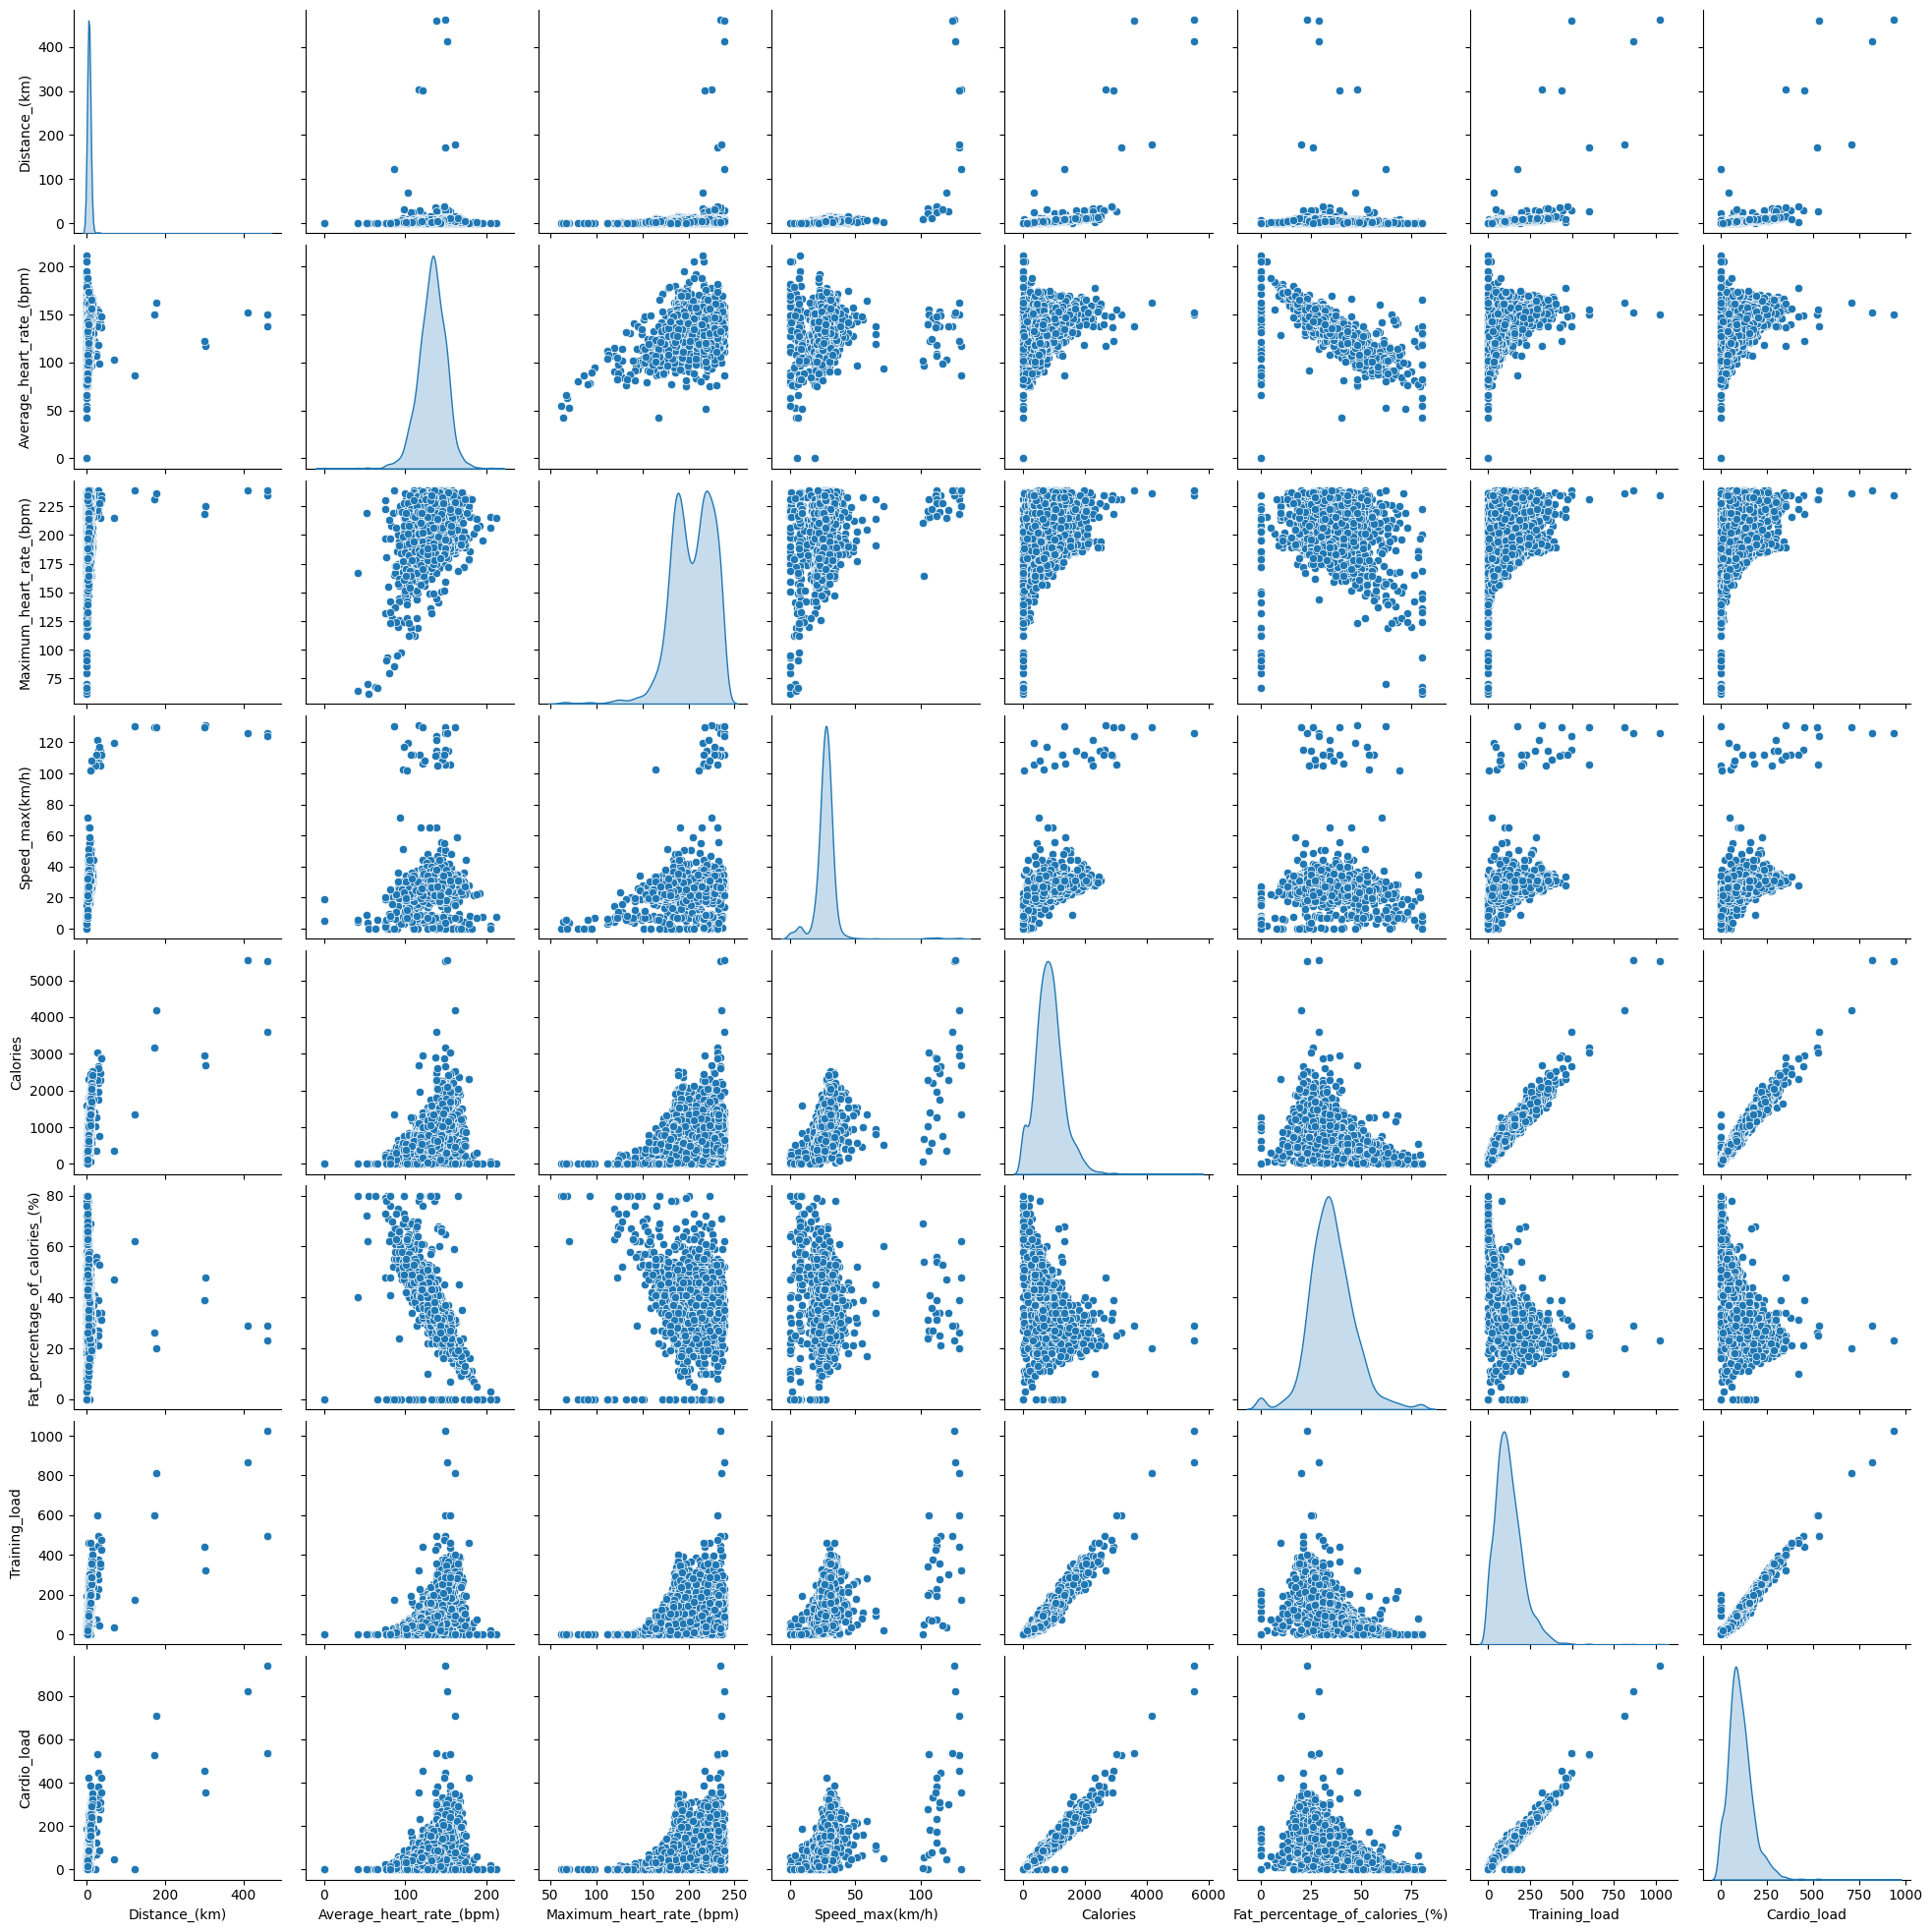

In [71]:
import seaborn as sns
#Pair plot continuous features
#Disable all warnings in Juyter notebook
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

sns.pairplot(df[['Distance_(km)', 'Average_heart_rate_(bpm)', 'Maximum_heart_rate_(bpm)',
'Speed_max(km/h)','Calories','Fat_percentage_of_calories_(%)','Training_load','Cardio_load']], diag_kind='kde')

In [72]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()

,PlayerNo,Distance_(km),Average_heart_rate_(bpm),Maximum_heart_rate_(bpm),Average_speed(km/h),Speed_max(km/h),Calories,Fat_percentage_of_calories_(%),Training_load,Cardio_load,week,month,year
PlayerNo,1.000000,-0.042036,0.052913,0.177720,-0.027452,0.004173,-0.018507,-0.010342,-0.040579,-0.016412,-0.001181,-0.002385,0.213441
Distance_(km),-0.042036,1.000000,0.070003,0.100162,0.807910,0.553673,0.459073,-0.058123,0.425256,0.475628,-0.046778,-0.042276,-0.005695
Average_heart_rate_(bpm),0.052913,0.070003,1.000000,0.297238,0.168983,0.105896,0.452401,-0.756217,0.565464,0.521912,-0.144909,-0.144461,0.033242
Maximum_heart_rate_(bpm),0.177720,0.100162,0.297238,1.000000,0.118409,0.221801,0.228586,-0.147683,0.190422,0.253630,-0.102847,-0.101207,0.174124
Average_speed(km/h),-0.027452,0.807910,0.168983,0.118409,1.000000,0.630275,0.346084,-0.142972,0.349956,0.381842,-0.114066,-0.110603,0.035102
Speed_max(km/h),0.004173,0.553673,0.105896,0.221801,0.630275,1.000000,0.533302,-0.069255,0.476381,0.509309,-0.043806,-0.041158,0.023609
Calories,-0.018507,0.459073,0.452401,0.228586,0.346084,0.533302,1.000000,-0.367745,0.957518,0.967828,-0.078091,-0.074611,-0.059389
Fat_percentage_of_calories_(%),-0.010342,-0.058123,-0.756217,-0.147683,-0.142972,-0.069255,-0.367745,1.000000,-0.498853,-0.444958,0.147528,0.145797,-0.005236
Training_load,-0.040579,0.425256,0.565464,0.190422,0.349956,0.476381,0.957518,-0.498853,1.000000,0.981542,-0.075466,-0.072078,-0.103188
Cardio_load,-0.016412,0.475628,0.521912,0.253630,0.381842,0.509309,0.967828,-0.444958,0.981542,1.000000,-0.078266,-0.074452,-0.078832


### Analysis for questionnaire

In [73]:
ques = pd.read_excel('/content/drive/MyDrive/Maryville/Primary Files/Semester 8/Sports Analytics/Questionnaire.xlsx')
ques.head()

,Player#,Phy 1,Injury,Sleep,Soc Train,Food,Hyd,Recov,Sore,TOTAL,Date
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,2022-03-04
1,5,3.0,NaN,5.0,4.0,5.0,5.0,4,Legs are pretty fatigued,26,2022-03-04
2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,2022-03-04
3,23,3.0,NaN,3.0,3.0,3.0,4.0,4,Legs,20,2022-03-04
4,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,2022-03-04


In [74]:
ques.Sore.value_counts(dropna=False)

,count
Sore,
NaN,1200
No,30
Hamstrings,16
none,9
Legs,8
Hamstring,6
Calves,4
calves,4
Left knee,3


In [75]:
ques.Injury.value_counts(dropna=False)

,count
Injury,
NaN,1266
No,48
none,17
Ankle,10
Back,4
Flu,3
no,3
Family issues,2
Dead leg in my calf,1


In [76]:
ques.TOTAL.value_counts(dropna=False)

,count
TOTAL,
--,925
23,55
22,55
24,53
25,45
21,43
19,42
20,33
17,30
